In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import models, layers, optimizers

## Descargamos los datos de imdb - Keras

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
train_data[0], train_labels[0], train_labels.shape

(25000,)

## Diccionario de palabras

In [4]:
word_index = imdb.get_word_index()
word_index

1641221/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [5]:
word_index = dict([(value, key) for (key, value) in word_index.items()])
word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [ ]:
for _ in train_data[0]:
    print(word_index.get(_-3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

## Función de one-hot encoding

In [6]:
def vectorizar(sequences, dim=10000):
    result = np.zeros((len(sequences), dim))
    for i, sequences in enumerate(sequences):
        result[i, sequences]=1
    return result

## Transformamos datos

In [7]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [9]:
x_train.shape
x_train[0],x_train[1],x_train[2400]

(array([0., 1., 1., ..., 0., 0., 0.]),
 array([0., 1., 1., ..., 0., 0., 0.]),
 array([0., 1., 1., ..., 0., 0., 0.]))

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Modelo

In [11]:
model = models.Sequential()
# Creacion de neuronas
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [12]:
# Compilacion
model.compile(optimizer='rmsprop',          # rmsprop: descenso de gradiente mejorada
              loss='binary_crossentropy',   # Funcion de perdida
              metrics = ['acc'])            # Metrica de exito

In [13]:
# Entrenamiento
# Validacion
x_val = x_train[:10000]
partial_x_val = x_train[10000:]

y_val = y_train[:10000]
partial_y_val = y_train[10000:]

In [27]:
# Entrenamiento de modelo
history = model.fit(partial_x_val, partial_y_val,
                    epochs=20,                      # Iteraciones
                    batch_size=512,                 # lotes de datos
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 68ms/step - loss: 0.1732 - acc: 0.9439 - val_loss: 0.3044 - val_acc: 0.8765
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1480 - acc: 0.9549 - val_loss: 0.2937 - val_acc: 0.8809
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1264 - acc: 0.9621 - val_loss: 0.3143 - val_acc: 0.8768
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1089 - acc: 0.9685 - val_loss: 0.3257 - val_acc: 0.8776
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0973 - acc: 0.9704 - val_loss: 0.3248 - val_acc: 0.8785
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0802 - acc: 0.9792 - val_loss: 0.3486 - val_acc: 0.8748
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0744 - acc: 0.9791 - val_loss: 0.3568 - val_acc: 0.8803
Epoch 8/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0604 - a

In [28]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [17]:
# history_dict

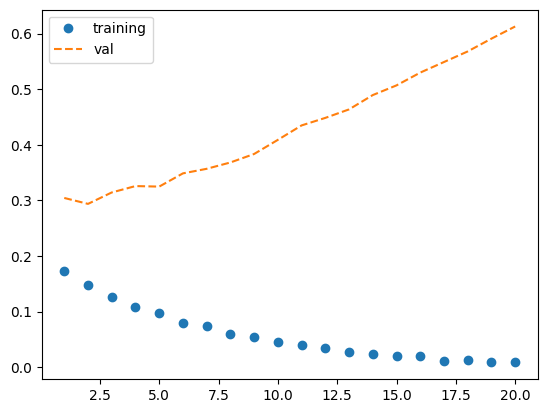

In [29]:
epoch = range(1, len(history_dict['loss'])+1)
plt.plot(epoch, history_dict['loss'], 'o', label='training')
plt.plot(epoch, val_loss_values, '--',label='val')
plt.legend()
plt.show()

In [22]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3000 - acc: 0.8788


[0.3000318109989166, 0.8788400292396545]

# Reduccion de overfitting
## Modelo menos complejo
Mientras la arquitectura se mas pequeño, se evita el overfiting

In [30]:
model2 = models.Sequential()
# Creacion de neuronas
model2.add(layers.Dense(4, activation="relu", input_shape=(10000,)))
model2.add(layers.Dense(4, activation="relu"))
model2.add(layers.Dense(1, activation="sigmoid"))

# Compilacion
model2.compile(optimizer='rmsprop',          # rmsprop: descenso de gradiente mejorada
              loss='binary_crossentropy',   # Funcion de perdida
              metrics = ['acc'])            # Metrica de exito

# Entrenamiento de modelo
history2 = model2.fit(partial_x_val, partial_y_val,
                    epochs=20,                       # Iteraciones
                    batch_size=512,                 # lotes de datos
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 94ms/step - loss: 0.6412 - acc: 0.7115 - val_loss: 0.5949 - val_acc: 0.8519
Epoch 2/20
30/30 [==============================] - 2s 61ms/step - loss: 0.5428 - acc: 0.8415 - val_loss: 0.5233 - val_acc: 0.8718
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4633 - acc: 0.8841 - val_loss: 0.4493 - val_acc: 0.8664
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3928 - acc: 0.9052 - val_loss: 0.3961 - val_acc: 0.8772
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3335 - acc: 0.9175 - val_loss: 0.3558 - val_acc: 0.8834
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2870 - acc: 0.9261 - val_loss: 0.3282 - val_acc: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2500 - acc: 0.9339 - val_loss: 0.3061 - val_acc: 0.8911
Epoch 8/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2204 - a

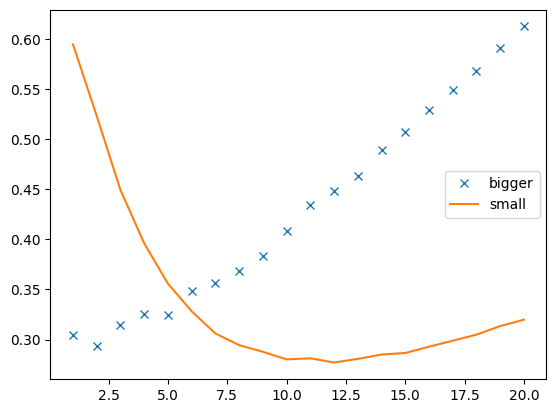

In [31]:
history_dict2 = history2.history
loss_values = history_dict2['loss']
val_loss_values = history_dict['val_loss']
val_loss_values2 = history2.history['val_loss']

epoch = range(1, len(history_dict2['loss'])+1)

# plt.plot(epoch, history_dict2['loss'], 'o') #, label='training')
plt.plot(epoch,val_loss_values, 'x',label='bigger')
plt.plot(epoch,val_loss_values2, '-',label='small')
plt.legend()
plt.show()

## Regularizacion

Epoch 1/20
30/30 [==============================] - 3s 95ms/step - loss: 0.5871 - acc: 0.7825 - val_loss: 0.4677 - val_acc: 0.8606
Epoch 2/20
30/30 [==============================] - 2s 65ms/step - loss: 0.3983 - acc: 0.8863 - val_loss: 0.3783 - val_acc: 0.8778
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.3188 - acc: 0.9101 - val_loss: 0.3464 - val_acc: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2764 - acc: 0.9229 - val_loss: 0.3568 - val_acc: 0.8742
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2504 - acc: 0.9348 - val_loss: 0.3303 - val_acc: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2327 - acc: 0.9408 - val_loss: 0.3328 - val_acc: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2167 - acc: 0.9469 - val_loss: 0.3378 - val_acc: 0.8842
Epoch 8/20
30/30 [==============================] - 1s 51ms/step - loss: 0.2077 - a

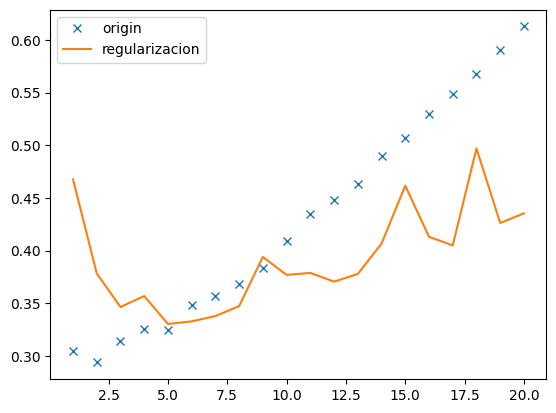

In [33]:
from keras import regularizers

model3 = models.Sequential()
# Creacion de neuronas
model3.add(layers.Dense(16, activation="relu", input_shape=(10000,), kernel_regularizer= regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation="relu", kernel_regularizer= regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation="sigmoid"))

# Compilacion
model3.compile(optimizer='rmsprop',          # rmsprop: descenso de gradiente mejorada
              loss='binary_crossentropy',   # Funcion de perdida
              metrics = ['acc'])            # Metrica de exito

# Entrenamiento de modelo
history3 = model3.fit(partial_x_val, partial_y_val,
                    epochs=20,                       # Iteraciones
                    batch_size=512,                 # lotes de datos
                    validation_data=(x_val, y_val))

history_dict3 = history3.history
loss_values = history_dict3['loss']
val_loss_values = history_dict['val_loss']
val_loss_values3 = history3.history['val_loss']

epoch = np.array(range(1, len(loss_values)+1))

plt.plot(epoch,val_loss_values, 'x',label='origin')
plt.plot(epoch,val_loss_values3, '-',label='regularizacion')
plt.legend()
plt.show()

## Dropout

Epoch 1/20
30/30 [==============================] - 2s 58ms/step - loss: 0.6456 - acc: 0.6281 - val_loss: 0.5616 - val_acc: 0.8408
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.5397 - acc: 0.7569 - val_loss: 0.4566 - val_acc: 0.8673
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4611 - acc: 0.8141 - val_loss: 0.3944 - val_acc: 0.8566
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.4054 - acc: 0.8434 - val_loss: 0.3446 - val_acc: 0.8754
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3497 - acc: 0.8721 - val_loss: 0.3017 - val_acc: 0.8848
Epoch 6/20
30/30 [==============================] - 2s 55ms/step - loss: 0.3120 - acc: 0.8902 - val_loss: 0.2899 - val_acc: 0.8879
Epoch 7/20
30/30 [==============================] - 2s 51ms/step - loss: 0.2749 - acc: 0.9061 - val_loss: 0.2864 - val_acc: 0.8872
Epoch 8/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2417 - a

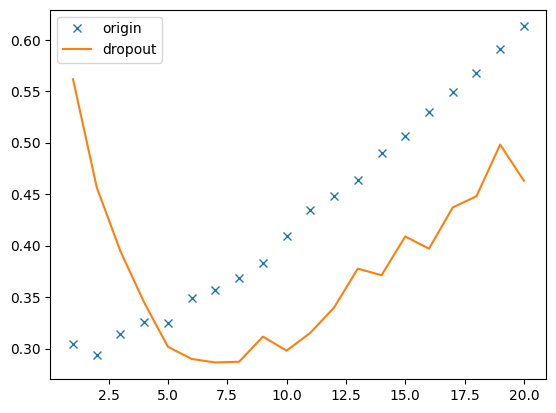

In [34]:
model4 = models.Sequential()
# Creacion de neuronas
model4.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model4.add(layers.Dropout(0.5)) # Desactivamos el 50%
model4.add(layers.Dense(16, activation="relu"))
model4.add(layers.Dropout(0.5)) # Desactivamos el 50%
model4.add(layers.Dense(1, activation="sigmoid"))

# Compilacion
model4.compile(optimizer='rmsprop',          # rmsprop: descenso de gradiente mejorada
              loss='binary_crossentropy',   # Funcion de perdida
              metrics = ['acc'])            # Metrica de exito

# Entrenamiento de modelo
history4 = model4.fit(partial_x_val, partial_y_val,
                    epochs=20,                       # Iteraciones
                    batch_size=512,                 # lotes de datos
                    validation_data=(x_val, y_val))

history_dict4 = history4.history
loss_values = history_dict4['loss']
val_loss_values = history_dict['val_loss']
val_loss_values4 = history4.history['val_loss']

epoch = np.array(range(1, len(loss_values)+1))

plt.plot(epoch,val_loss_values, 'x',label='origin')
plt.plot(epoch,val_loss_values4, '-',label='dropout')
plt.legend()
plt.show()